In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import nibabel as nib
import scipy.io

In [3]:
with h5py.File('TrainData_v_1.0.h5', 'r') as f:
    # List all groups/datasets
    print(list(f.keys()))

    lipids = f['lipid'][:]
    metab = f['metab'][:]
    spectra = f['spectra'][:]
    water = f['water'][:]

['lipid', 'lipid_proj', 'lipid_projOP', 'metab', 'spectra', 'water']


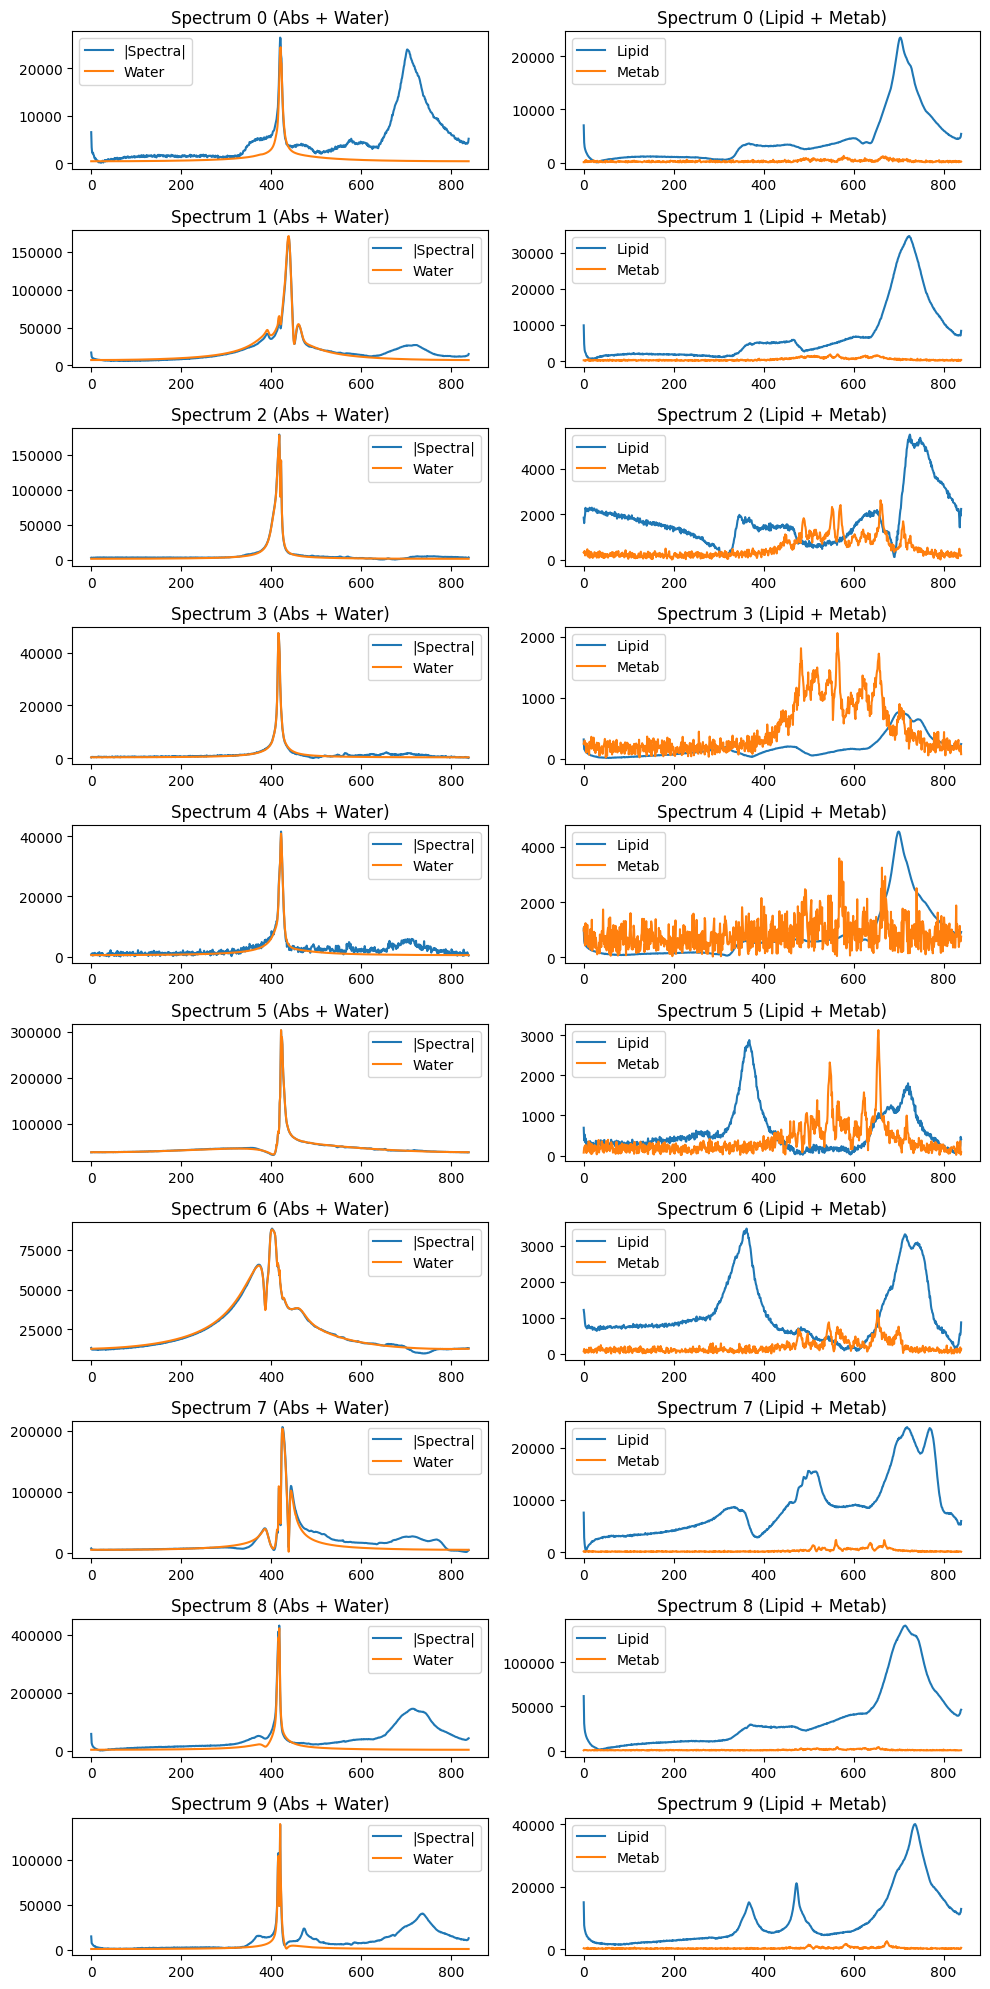

In [12]:
# Plot
fig, axes = plt.subplots(10, 2, figsize=(10, 20))

for i in range(10):
    # Left column: absolute spectrum + water
    axes[i, 0].plot(np.abs(spectra[i]), label='|Spectra|')
    axes[i, 0].plot(np.abs(water[i]), label='Water')
    axes[i, 0].legend()
    axes[i, 0].set_title(f"Spectrum {i} (Abs + Water)")

    # Right column: lipids + metab
    axes[i, 1].plot(np.abs(lipids[i]), label='Lipid')
    axes[i, 1].plot(np.abs(metab[i]), label='Metab')
    axes[i, 1].legend()
    axes[i, 1].set_title(f"Spectrum {i} (Lipid + Metab)")

plt.tight_layout()
plt.show()


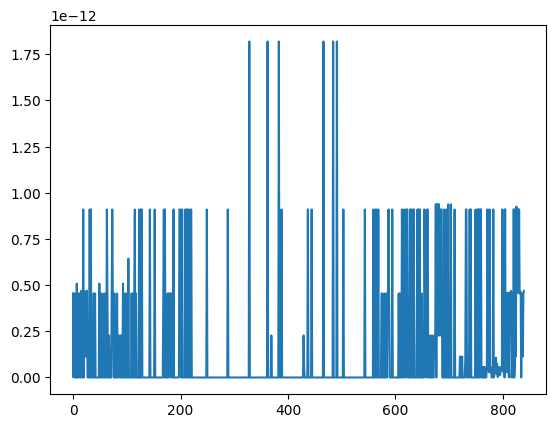

In [11]:
#double check that things add up to 0 (okay, only numerical rounding errors)

n= 10
Line = np.abs(spectra[n,:]-lipids[n,:]-metab[n,:]-water[n,:])
plt.plot(Line)
